In [21]:
import tweepy as tw
from textblob import TextBlob

consumer_key = 'Q2cavfdoYY6AbsENpgGudO9ds'
consumer_secret = 'ZZeQ1ToBl9DhjXPuRWwAJeN1mv3JU3eNJYhITQfvKgEawKebAi'

access_token = '3031863324-GuCJx2mNRPFdFPrD4xyEJpUIP0ZfpzuVV8X4rEn'
access_token_secret = '6v93b1RgyeYZadQ2jIudF8g2hJcxCHQZWQBWe8IzVYSxA'

aut = tw.OAuthHandler(consumer_key , consumer_secret)
aut.set_access_token(access_token,access_token_secret)

api = tw.API(aut)

public_tweets = api.search('#rafale')

In [31]:
i =1;
for tweet in public_tweets:
    print("Contributor :" , tweet.contributors)
    print("Co-ordinates :",tweet.coordinates)
    print("Time : ",tweet.created_at)
    print("Tweet text : " )
    print(tweet.text)
    analysis  =  TextBlob(tweet.text)
    print(analysis.sentiment)
    print("Tweet Number :" , i )
    i= i+1;
    print("___________________________")

Contributor : None
Co-ordinates : None
Time :  2018-09-03 04:50:24
Tweet text : 
RT @KPCCPresident: The #Congress will hold protests against the #Rafale scam in all districts of Karnataka from September 6. The youth of t…
Sentiment(polarity=0.0, subjectivity=0.0)
Tweet Number : 1
___________________________
Contributor : None
Co-ordinates : None
Time :  2018-09-03 04:50:22
Tweet text : 
RT @DrGPradhan: I disagree @Ra_THORe, Pappu is not suffering from anything. Weeds keep him high. He is actually under huge pressure from "A…
Sentiment(polarity=0.18666666666666668, subjectivity=0.5133333333333333)
Tweet Number : 2
___________________________
Contributor : None
Co-ordinates : None
Time :  2018-09-03 04:49:22
Tweet text : 
RT @abhijitmajumder: Top Congress leader met US arms companies before #Rafale storm arrived? ⁦@ajitkdubey⁩ in ⁦@MyNation⁩ https://t.co/HUVj…
Sentiment(polarity=0.5, subjectivity=0.5)
Tweet Number : 3
___________________________
Contributor : None
Co-ordinates : None
Tim

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output



data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [16]:
data = data[data.sentiment != 'Neutral']
train , test = train_test_split(data ,test_size = 0.2 )

In [19]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

Positive words


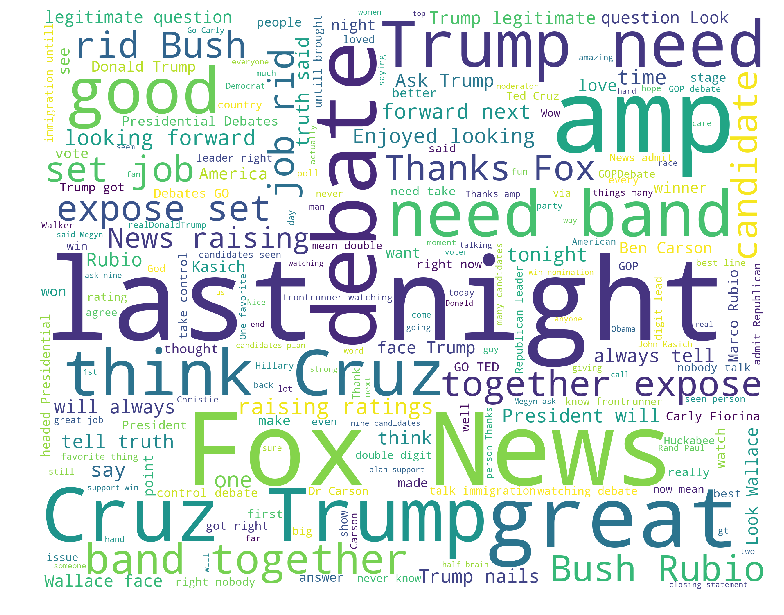

Negative words


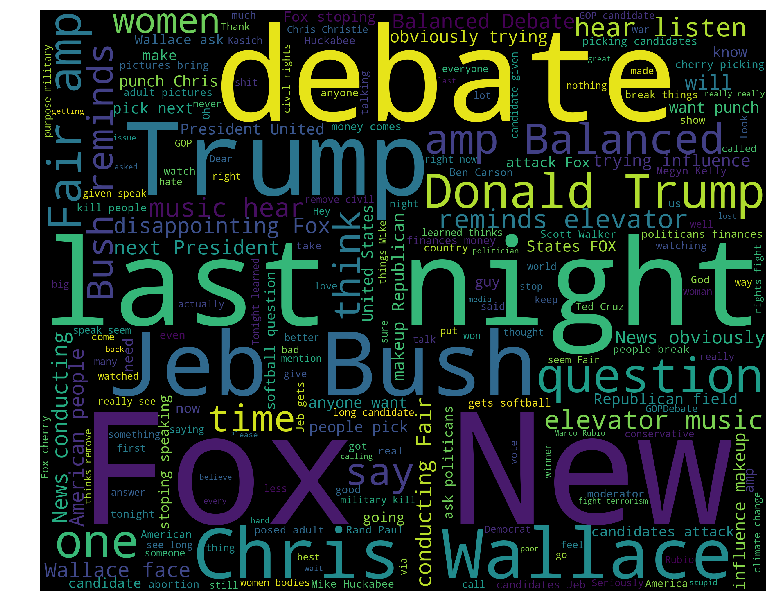

In [20]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)